In [1]:
from glob import glob

import anndata
import numpy as np
import pandas as pd
import plotnine as p
from scipy import stats
import scvi

%matplotlib inline

Global seed set to 0


In [2]:
adata = anndata.read('Ren et al 2021/GSE158055_covid19_meta_S-M040-1_pbmcs.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 14565 × 27943
    obs: 'Meta sample', 'Sample name', 'title', 'organism', 'Patients', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'geo accession', 'instrument model'

In [4]:
gene_panel = [
    'CLEC9A', 'CADM1', 'CLEC10A', 'CD1C', 'CD14', 'VCAN', 'CCR7', 'LAMP3', 'AXL', 'SIGLEC6', 'LILRA4', 'ITM2C',
    'GZMB', 'IL1B', 'IER3', 'LDLR', 'CD83', 'S100A12', 'CSF3R', 'FCGR3A', 'MS4A7', 'LILRB1', 'CSF1R',
    'CDKN1C', 'C1QA', 'C1QB', 'C1QC', 'CCR1', 'MARCO', 'MKI67', 'TOP2A',
    
    'CD141', 'CLEC9A', 'KIT', 'BTLA', 'CD1C', 'CD101', 'FCER1a', 'CD5', 'CD123', 'CD45RA', 'CD304', 'CD14',
    'CD99', 'CD64', 'CR1', 'ITGAM', 'CD16', 'C5AR1', 'CX3CR1',
    
    'NFKBIA', 'FOSB', 'IL1B', 'S100A8', 'S100A9', 'CD74', 'B2M', 'FTL', 'IL16', 'CCL2', 'CCL8', 'CCL7',
    'CCL4L2', 'CCL3', 'CCL4', 'CCL18', 'CXCL8', 'CXCL16', 'CXCL10',
    
    'TNF', 'IL6', 'IL12A', 'IL12B', 'IL23A', 'IL10', 'IL27',
    
    'TIMP1', 'GP9', 'MPIG6B', 'PF4', 'CLEC1B', 'RAP1B', 'SRGN', 'PPBP', 'STXBP2', 'PFN1',
    
    'CD34', 'AVP', 'CD38', 'GATA1', 'MPO',
    
    'CD3G', 'CCR7', 'CD27', 'CD4', 'CD28', 'TNFRSF9', 'CCR6', 'CD40LG', 'TBX21', 'GATA3', 'RORC', 'IKZF2',
    'FOXP3', 'CTLA4', 'PDCD1', 'CXCR5', 'CD8A', 'GZMB', 'HLA-DRB1', 'IFNG', 'LAG3', 'TOX', 'IL7R',
    'KLRG1', 'TRDV2', 'TRGV9', 'TRAV1.2', 'NCAM1', 'NCR1', 'FCGR3A',
    
    'CD3', 'CCR7', 'CD45RO', 'CD27', 'CD28', 'CD62L', 'CD25', 'CTLA4', 'CXCR5', 'CD40LG', 'ICOS', 'CXCR3',
    'CD8',
    
    'MS4A1', 'CD19', 'CD40', 'CD69', 'CD22', 'FCER2', 'CD24', 'CR2', 'MME', 'MKI67', 'IGHD', 'IGHM',
    'IGHA1', 'IGHG1', 'MZB1', 'CD27', 'TNFRSF13B', 'CD38', 'SDC1',
    
    'FOS', 'KLF2', 'PNRC1', 'NFKB1', 'JUN', 'DUSP1', 'FOSB', 'GADD45B', 'IER2', 'ZFP36', 'PPP1R15A',
    'NFKBIA', 'CD69', 'BTG2', 'CD79A', 'CD79B', 'PTPRC', 'LYIN', 'BLNK', 'SIGLEC10', 'PECAM1',
]

In [5]:
adata.var['feature_name'] = adata.var.index

var_idx = adata.var.query('feature_name in @gene_panel').index

fadata = adata[:, var_idx].copy()

In [6]:
fadata.obs['total_counts'] = np.array(fadata.X.sum(1))

In [7]:
fadata

AnnData object with n_obs × n_vars = 14565 × 141
    obs: 'Meta sample', 'Sample name', 'title', 'organism', 'Patients', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'geo accession', 'instrument model', 'total_counts'
    var: 'feature_name'

In [8]:
sindex = fadata.obs.sample(10).index

In [9]:
sX = np.array(fadata[sindex].X.todense())

In [10]:
sobs = fadata.obs.loc[sindex]

In [11]:
sobs['total_counts']

index
d13_PGW8_TCAGCTCGTCCATCCT    308.0
d13_PGW8_CCGTTCACAATGAAAC    192.0
d13_PGW8_CCTCTGAAGTGTTGAA    228.0
d13_PGW8_ATGCGATGTCATATGC    567.0
d13_PGW8_CAACCAAAGGCCCTCA    151.0
d13_PGW8_TTGTAGGAGTCTCAAC    369.0
d13_PGW8_GTCCTCAGTTCGTCTC     64.0
d13_PGW8_TGCGCAGCACATTAGC     74.0
d13_PGW8_GTGTTAGAGCCGTCGT     84.0
d13_PGW8_GCGCCAAAGCCACGTC     40.0
Name: total_counts, dtype: float32

In [12]:
stats.binom.rvs(500, (sX.T / sobs['total_counts'].values).T)

array([[  0,   0, 103, ...,   0,   0,   0],
       [  0,   0,  43, ...,   0,   0,   0],
       [  0,   6,  34, ...,   0,   3,  11],
       ...,
       [  0,   0, 189, ...,   0,   0,   0],
       [  0,   0, 333, ...,   0,   0,   0],
       [  0,   0, 257, ...,  32,   0,   0]])

In [13]:
btsfadatas = []
for i, n in enumerate(np.exp(np.linspace(np.log(10), np.log(500), 128)).round()):
    Xn = stats.binom.rvs(int(n), (sX.T / sobs['total_counts'].values).T)
    btsfadata = anndata.AnnData(X = Xn, obs = sobs, var = fadata.var)
    btsfadata.obs['thinning'] = n
    btsfadata.obs['idx'] = sobs.index
    btsfadata.obs.index = sobs.index + f'_{i}'
    btsfadatas += [btsfadata]

C:\Users\vale\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  after removing the cwd from sys.path.


In [14]:
btadata = anndata.concat(btsfadatas)

In [15]:
fadata.obs['thinning'] = np.nan

In [16]:
fadata.obs['idx'] = fadata.obs.index

In [17]:
cadata = anndata.concat([fadata, btadata])

In [18]:
scvi.model.SCVI.setup_anndata(cadata)

INFO      No batch_key inputted, assuming all cells are same batch                           
INFO      No label_key inputted, assuming all cells have same label                          
INFO      Using data from adata.X                                                            
INFO      Successfully registered anndata object containing 15845 cells, 141 vars, 1 batches,
          1 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0     
          extra continuous covariates.                                                       
INFO      Please do not further modify adata until model is trained.                         


In [19]:
vae = scvi.model.SCVI(cadata, n_layers = 2, n_latent = 2, gene_likelihood = "poisson")

In [20]:
vae.train(max_epochs = 250, use_gpu = True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 250/250: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [04:54<00:00,  1.18s/it, loss=72.7, v_num=1]


In [21]:
cadata.obsm["X_scVI"] = vae.get_latent_representation()

In [22]:
for i, z in enumerate(cadata.obsm['X_scVI'].T):
    cadata.obs[f'Z_{i + 1}'] = z

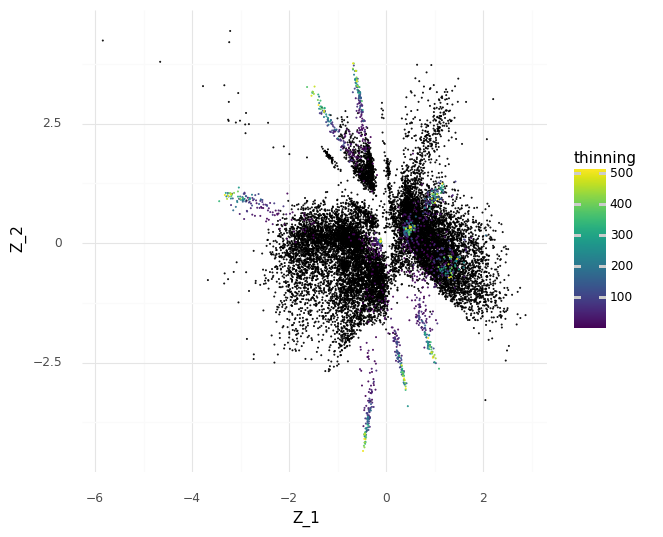

<ggplot: (-9223371961083597676)>


In [23]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(x = 'Z_1', y = 'Z_2', color = 'thinning'), cadata.obs)
    + p.geom_point(shape = '.', size = 0.1)
    + p.theme_minimal()
)

print(p_)

In [24]:
sX.sum()

2077.0

In [25]:
sX.sum(0) / sX.sum()

array([0.        , 0.00144439, 0.17477131, 0.00048146, 0.00048146,
       0.        , 0.        , 0.        , 0.        , 0.00048146,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00240732, 0.        , 0.00192585, 0.00192585, 0.00048146,
       0.00048146, 0.        , 0.00096293, 0.00048146, 0.        ,
       0.        , 0.00240732, 0.00144439, 0.00048146, 0.        ,
       0.        , 0.00144439, 0.16466057, 0.00481464, 0.00192585,
       0.00144439, 0.        , 0.00770342, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00096293, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01444391, 0.00240732,
       0.00096293, 0.00914781, 0.00096293, 0.        , 0.16321617,
       0.00096293, 0.        , 0.00096293, 0.        , 0.01636976,
       0.01636976, 0.        , 0.00481464, 0.00048146, 0.     

In [26]:
stats.binom.rvs(500, fadata.X.sum(0) / fadata.X.sum())

array([ 0,  0, 83,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,
        0,  0,  2, 49,  1,  1,  0,  2,  2,  0,  0,  1,  0,  0,  0,  0,  2,
        0,  1,  0,  1,  0,  0,  0, 11,  0,  2, 12,  3,  0, 87,  0,  0,  0,
        2,  2,  5,  0,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  0,  0,  2,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  1,  0,  0,  0,  5,  0,  1,  0, 27,  4,  0,  4,
        2,  1,  0,  7, 78, 73,  0,  0,  0,  2,  3,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  9])